<a href="https://colab.research.google.com/github/A-Kutscher/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Amber_Kutscher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Amber Kutscher

## Project Overview


#### Link to original dataset
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

### Part 1:
The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

### Part 2:
We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: download the data. (Note: Original data source).
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:
    1. How many rows and columns?
    2. What are the datatypes of each variable?
    3. Are there duplicates? If so, drop any duplicates.
    4. Identify missing values.
    5. Address the missing values by using a placeholder value.
    6. Confirm that there are no missing values after addressing them.
    7. Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
    8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Part 3:
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:
- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

Start updating the README file associated with the project.
- Add text describing the project.
= Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

### Part 4:
We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​

For each feature:
- Add a new markdown header.
- Paste the feature's definition from the data dictionary into a markdown cell.
- Create a univariate visualization showing the distribution of values/categories.
  - You may use the EDA functions from the previous lessons or create your own visualizations.
- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Is the feature constant or quasi-constant?
  - What is the cardinality? Is it high (>10)?
  - Would we know this feature before the target is determined?
  - Is there a business case/understanding reason to exclude based on our business case?
- Create a multivariate visualization plotting each feature vs. the target.
  - You may use the EDA functions from the previous lessons or create your own visualizations.​
- Answer the following questions from the Feature Inspection lesson in a Markdown cell:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Does this feature appear to be a predictor of the target?

### Data Dictionary

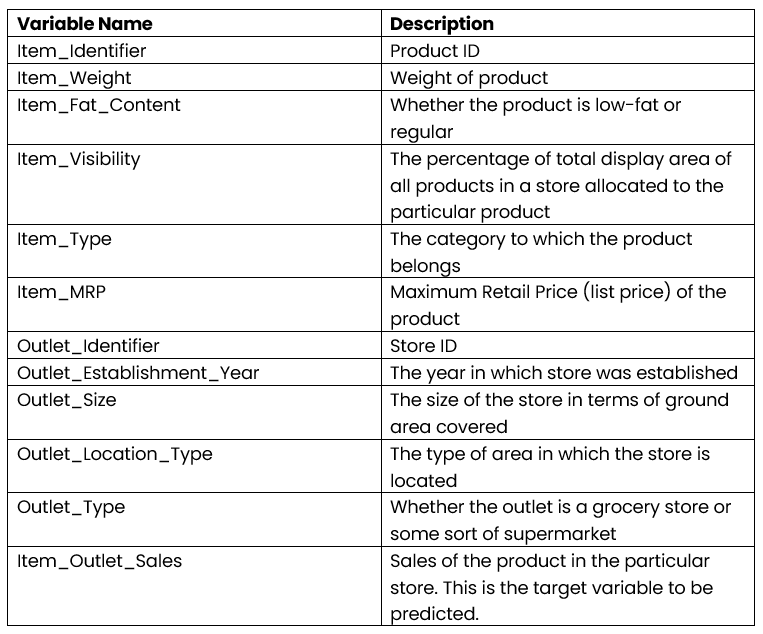

## Imports

In [118]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [119]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Save a filepath and load the data under a new name
df_sales_predictions = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(df_sales_predictions)

In [121]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [122]:
# Display the last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [123]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 1. How many rows and columns?
- There are 8523 rows and 12 columns.

### 2. What are the datatypes of each variable?
- See below

In [124]:
# Identify the dtypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Clean Data

### 3. Are there duplicates? If so, drop any duplicates.

In [125]:
#Check for duplicates
df.duplicated().sum()

0

- There are zero (0) duplicates in this dataset.

### 4. Identify missing values.

In [126]:
# Check for any missing values for all columns and save as a variable
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [127]:
# Use the above resuolts to find the percentage (%) of the missing data
null_perent = null_sums/len(df)*100
null_perent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values
  - There are **1463** missing values in the **Item_Weight** column. This equates to **17.17%**.
  - There are **2410** missing values in the **Outlet_Size** column. This equates to **28.28%**.

### 5. Address the missing values by using a placeholder value.

In [128]:
# Create a list of categorical column names.
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [129]:
# Use the aforementioned list to fill null values with MISSING.
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [130]:
# Create a list of numeric column names.
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [131]:
# Use the aforementioned list to fill null values with -1.
df[num_cols] = df[num_cols].fillna(-1)

### 6. Confirm that there are no missing values after addressing them.

In [132]:
# Confirm that there are no more nulls
null_counts = df.isna()
null_counts

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


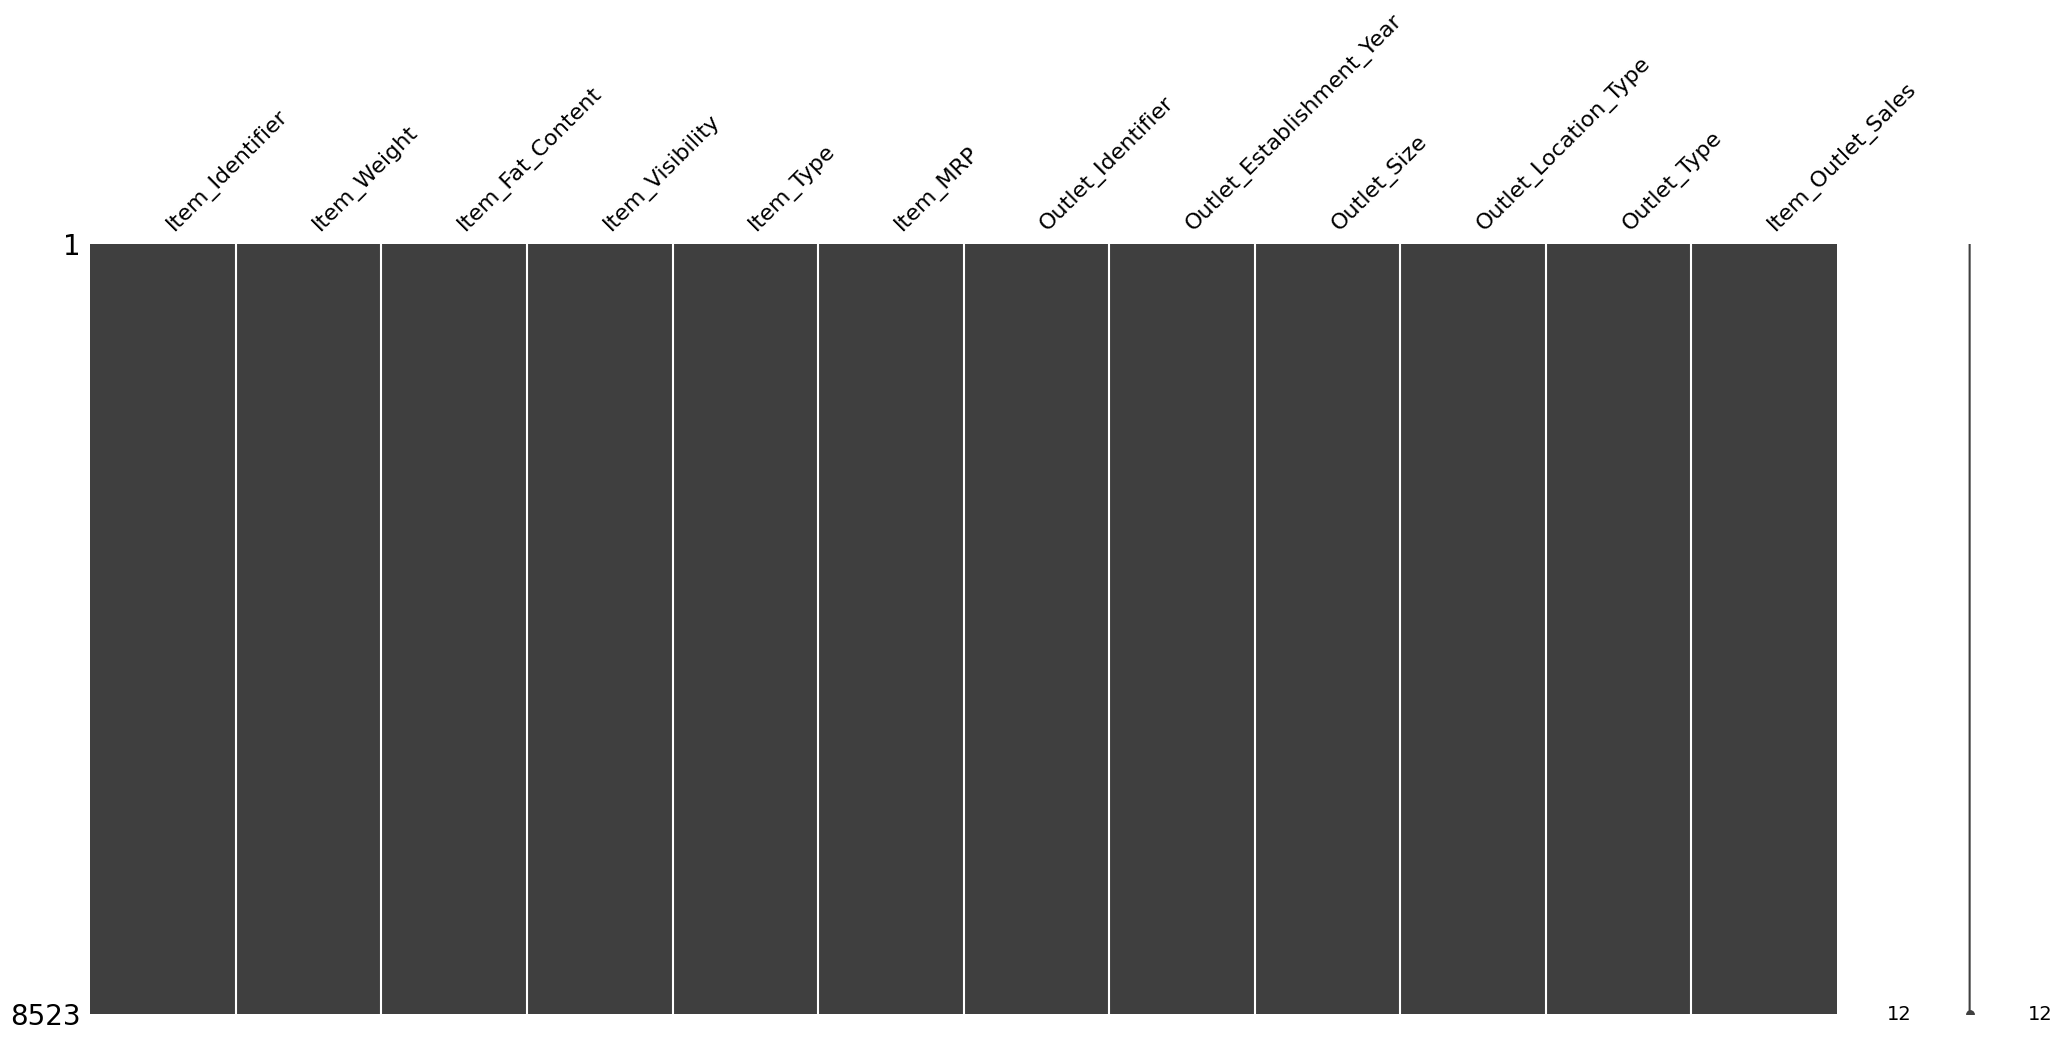

In [133]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

### 7. Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).|

In [134]:
# Create a list of object columns.
object_cols = df.select_dtypes(include="object").columns
object_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [135]:
# Check the nunique for just the object columns.
object_cols_nunique = df[object_cols].nunique()
object_cols_nunique

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [136]:
# Look over each categorical column to identify any values that need to be replaced
print(df['Item_Fat_Content'].unique())
print('\n')
print(df['Item_Type'].unique())
print('\n')
print(df['Outlet_Identifier'].unique())
print('\n')
print(df['Outlet_Size'].unique())
print('\n')
print(df['Outlet_Location_Type'].unique())
print('\n')
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


['Medium' 'MISSING' 'High' 'Small']


['Tier 1' 'Tier 3' 'Tier 2']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [137]:
# Fix values in Item_Fat_Content column to be cohesive
df.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace=True)
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


- Note that out of the seven (7) categorical columns remaining:
  - Six (6) columns have a small number of categories. (Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type)
  - One (1) column has over one-hundred (100) categories. (Item_Identifier)
- The Item_Identifier column is important for identification purposes, so we will keep that column in the dataset.

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [138]:
# Find the summary statistics for any numerical columns.
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [139]:
# Use stats.loc to find the min, mean, and max.
stats = df.describe()
stats.loc[['min', 'mean', 'max']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.00,0.00,31.29,1985.00,33.29
mean,10.48,0.07,140.99,1997.83,2181.29
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Data Analysis

### Create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

#### - Histograms to view the distributions of numerical features in your dataset.

In [140]:
# Select numerical columns.
print(num_cols)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


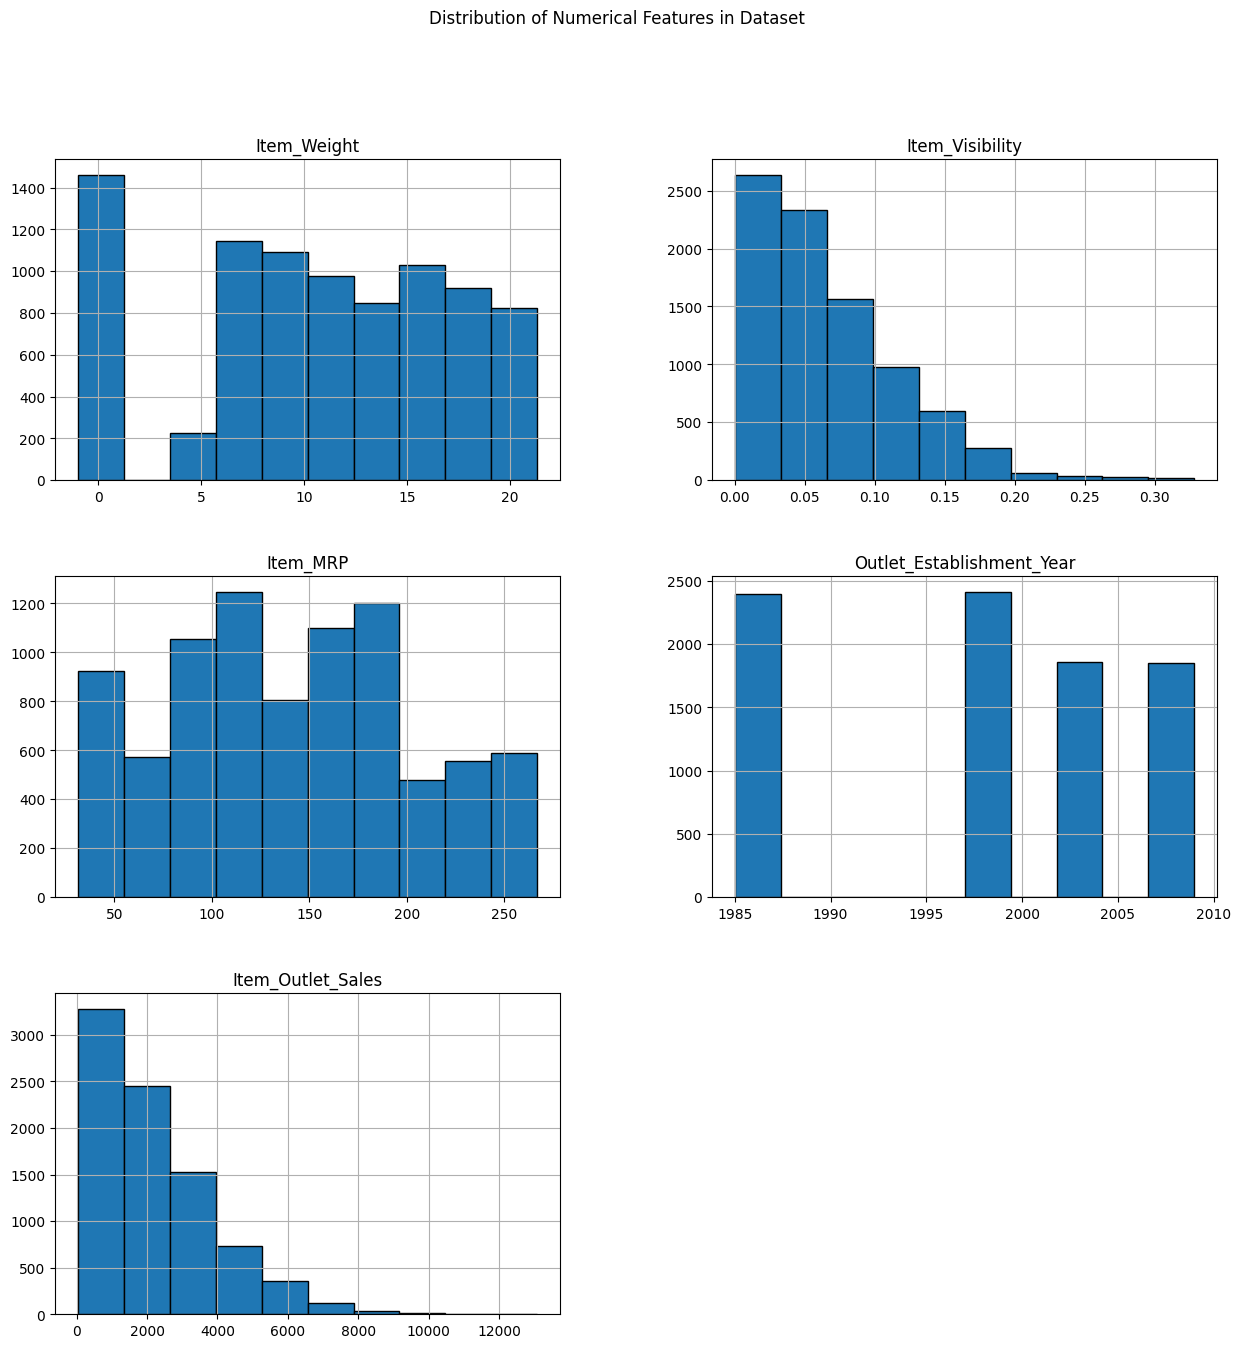

In [141]:
# Create a histogram to view the distributions of numerical features in the dataset.
df[num_cols].hist(bins=10, figsize=(15,15), edgecolor='black');
plt.suptitle('Distribution of Numerical Features in Dataset');

#### - Boxplots to view statistical summaries of numerical features in your dataset.

In [142]:
# Obtain the summary stats for all of the numerical features.
summary_stats = df[num_cols].describe()
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


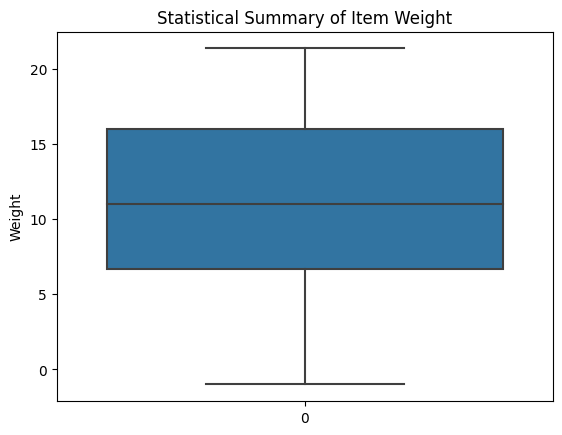

In [143]:
# Create boxplots to view the statistical summary for Item_Weight.
fig, ax = plt.subplots()
data_weight = df["Item_Weight"]
ax = sns.boxplot(data_weight)
ax.set_ylabel('Weight')
ax.set_title('Statistical Summary of Item Weight');

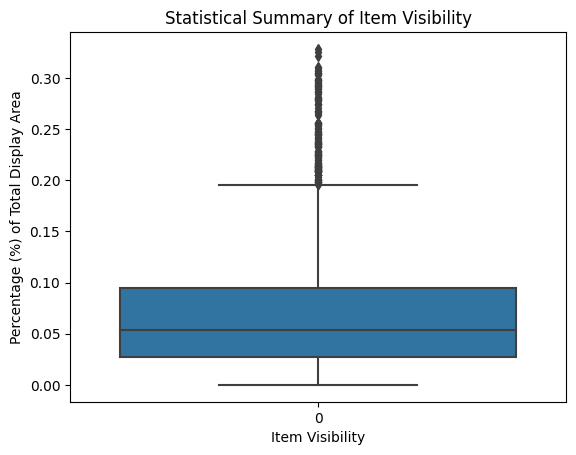

In [144]:
# Create boxplots to view the statistical summary for Item_Visibility.
fig, ax = plt.subplots()
data_vis = df["Item_Visibility"]
ax = sns.boxplot(data_vis)
ax.set_ylabel('Percentage (%) of Total Display Area')
ax.set_xlabel('Item Visibility')
ax.set_title('Statistical Summary of Item Visibility');

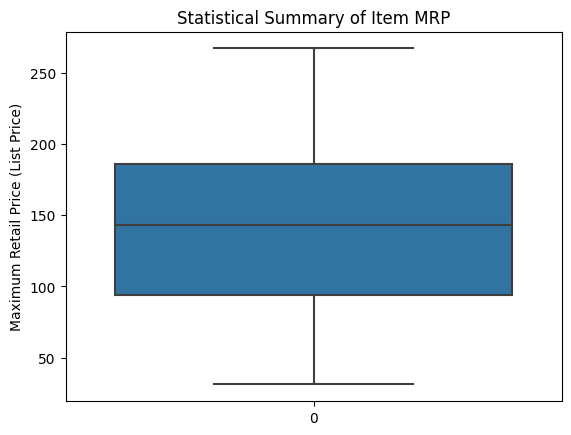

In [145]:
# Create boxplots to view the statistical summary for Item_MRP.
fig, ax = plt.subplots()
data_mrp = df["Item_MRP"]
ax = sns.boxplot(data_mrp)
ax.set_ylabel('Maximum Retail Price (List Price)')
ax.set_title('Statistical Summary of Item MRP');

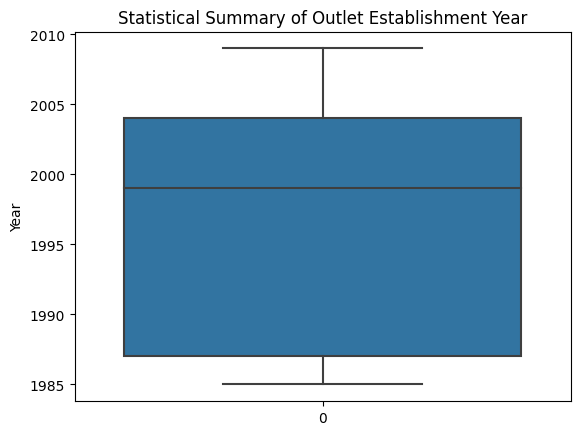

In [146]:
# Create boxplots to view the statistical summary for Outlet_Establishment_Year.
fig, ax = plt.subplots()
data_year = df["Outlet_Establishment_Year"]
ax = sns.boxplot(data_year)
ax.set_ylabel('Year')
ax.set_title('Statistical Summary of Outlet Establishment Year');

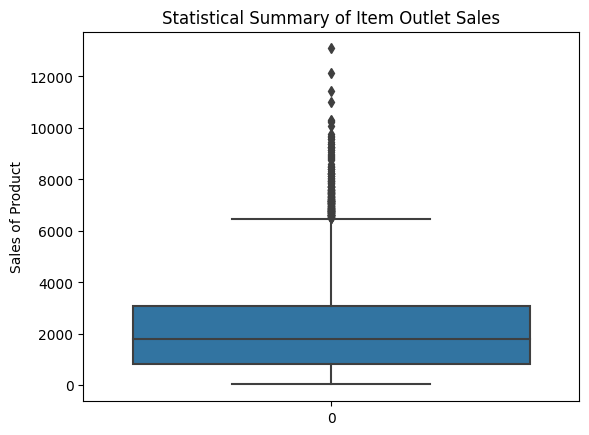

In [147]:
# Create boxplots to view the statistical summary for Item_Outlet_Sales.
fig, ax = plt.subplots()
data_sales = df["Item_Outlet_Sales"]
ax = sns.boxplot(data_sales)
ax.set_ylabel('Sales of Product')
ax.set_title('Statistical Summary of Item Outlet Sales');

#### - Countplots to view the frequency of each class of categorial features in your dataset.

In [148]:
# Check the updated nunique for just the object columns.
updated_object_cols_nunique = df[object_cols].nunique()
updated_object_cols_nunique

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [149]:
# Call unique categorical columns, minus (-) extreme nunique column
# 'Item_Identifier' as that column has too many frequencies to plot
cat_features = [col for col in cat_cols if col != 'Item_Identifier']
print(cat_features)

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


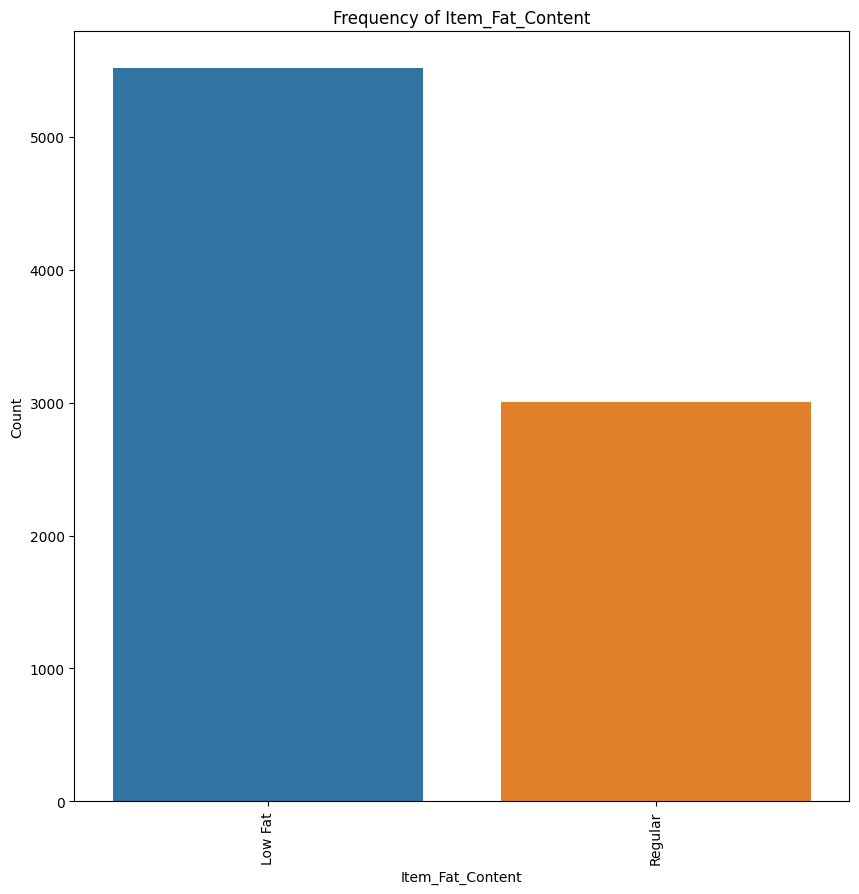

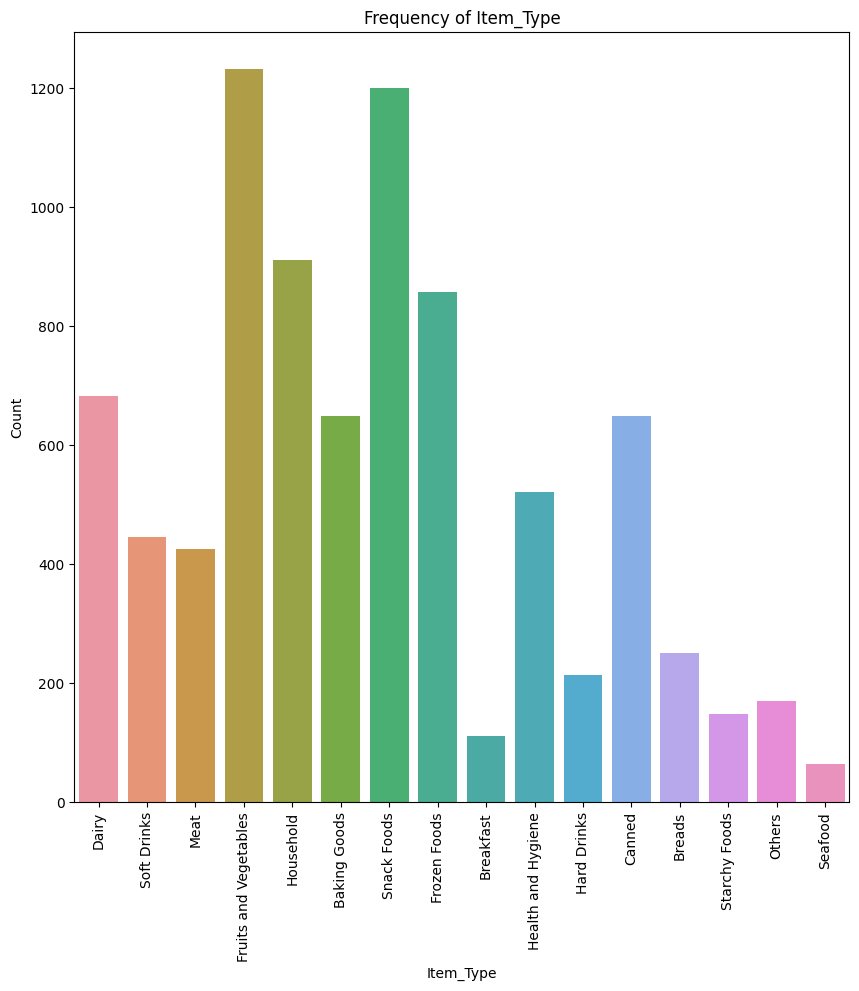

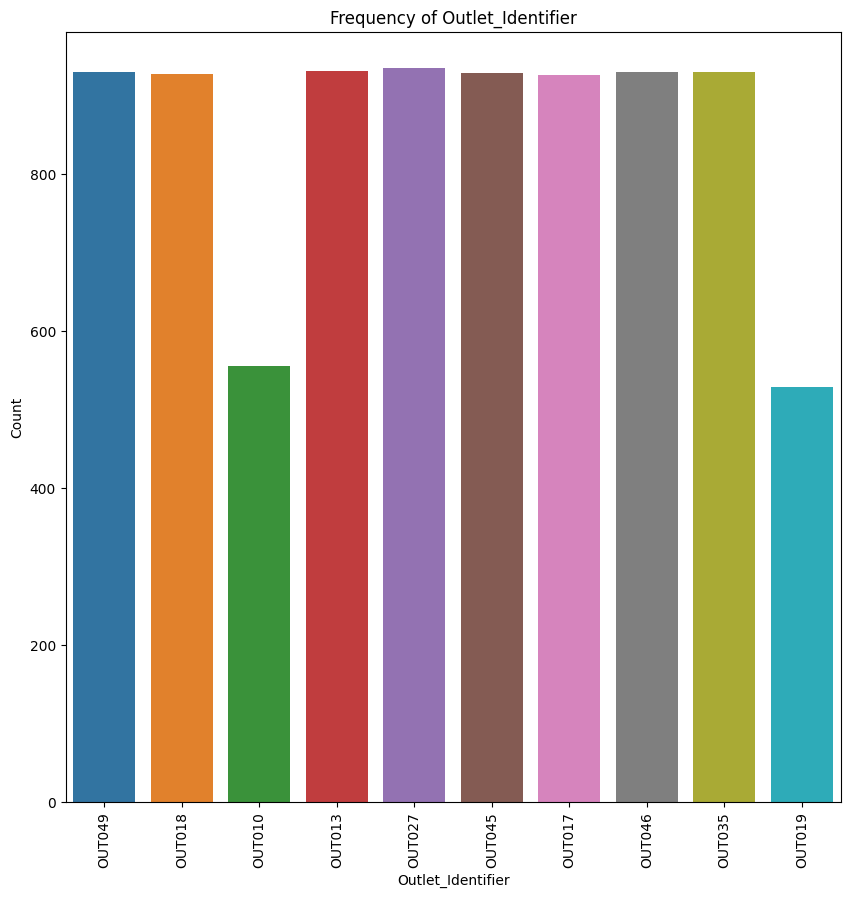

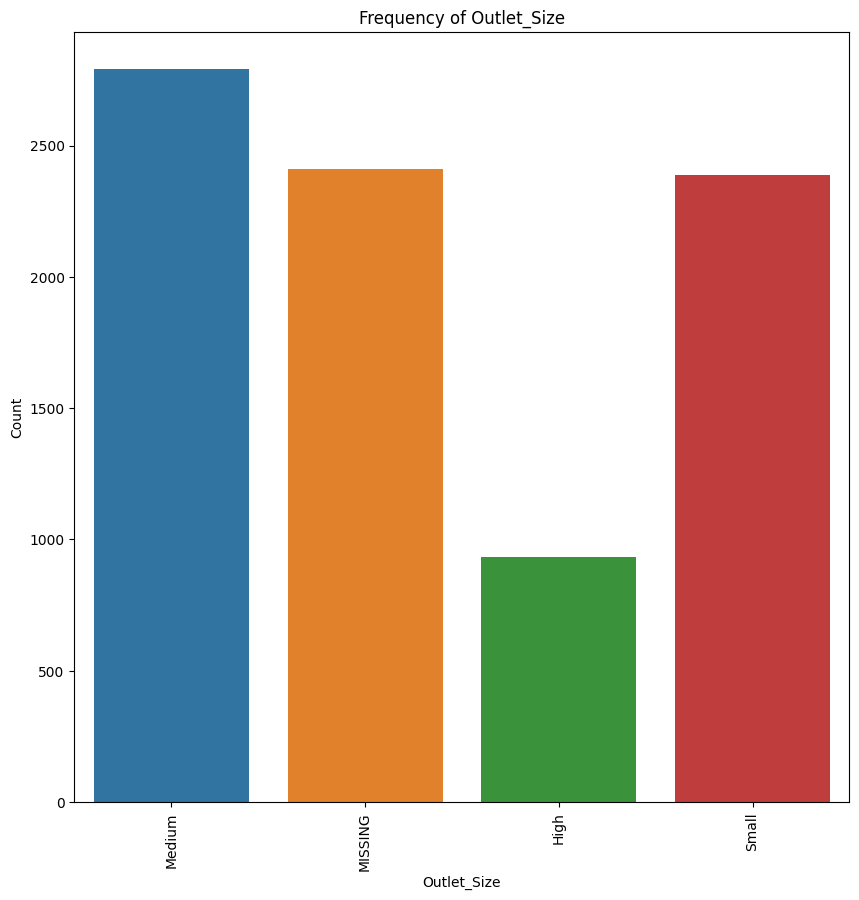

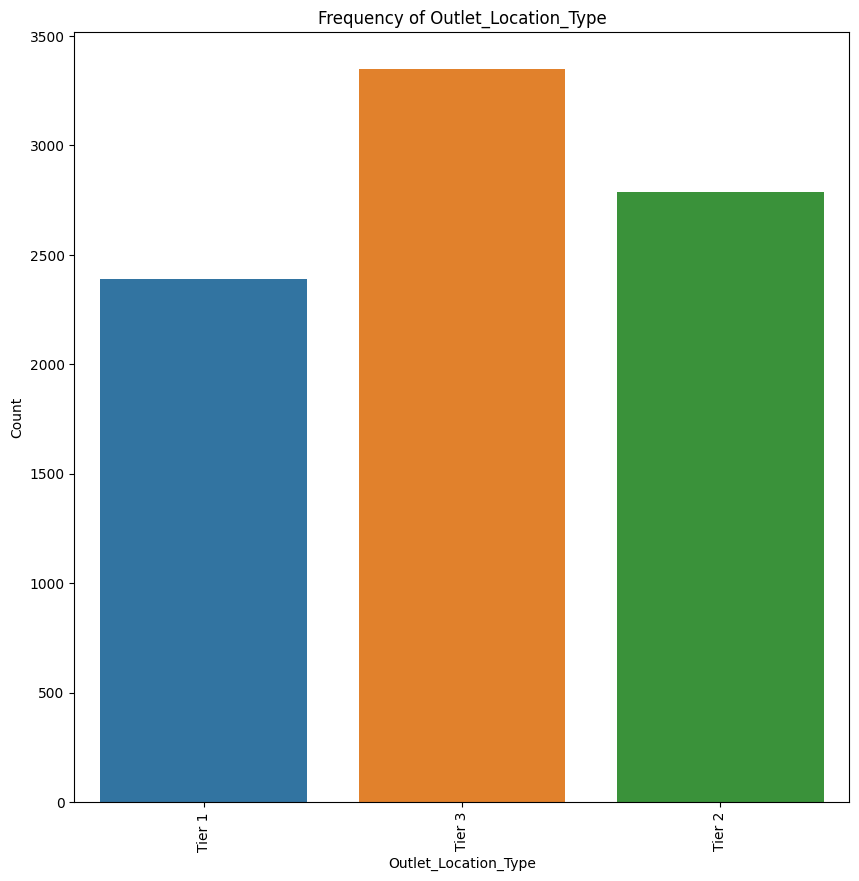

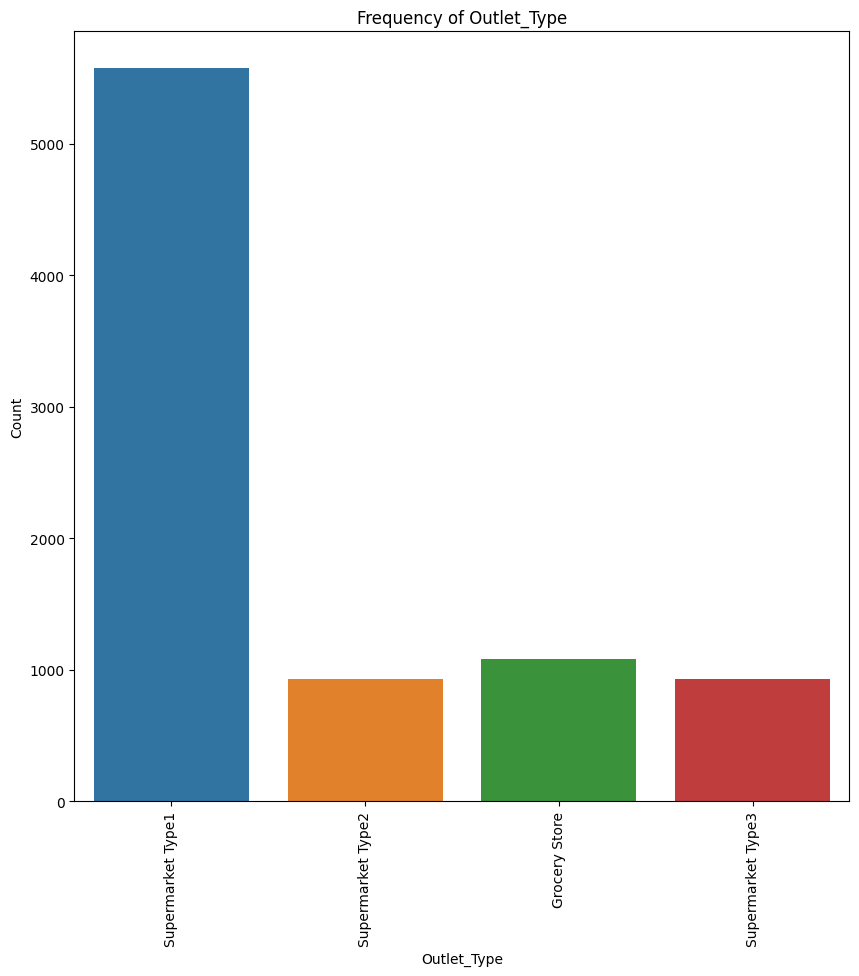

In [150]:
# Create countplots to view the frequency of each class of categorical features in the dataset
for feature in cat_features:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=feature, data=df)
    plt.title(f"Frequency of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    print

#### - Heatmap to view the correlation between features.

In [151]:
# Get correlations for numeric columns.
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


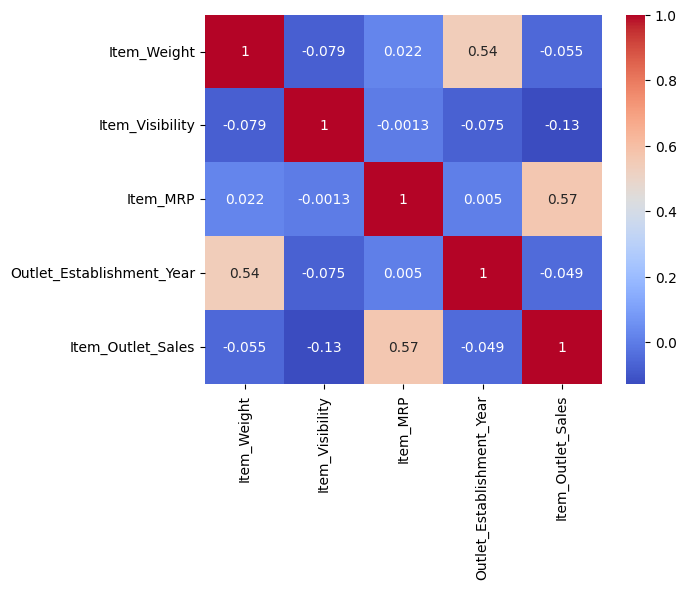

In [152]:
# Create a heatmap to view the correlation between features.
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

## Feature Inspection

In [153]:
# Let's practice on Item_Weight
x = 'Item_Weight'
# Before filling in the NA values with a placeholder, let's get the count and percentage
temp_df = df.copy()
# Save null values counts
null_count = temp_df[x].isna().sum()
# Calculate the percentage of null values
null_perc = null_count/len(temp_df)* 100
# Print the null value info with an f-statement
print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

- NaN's Found: 0 (0.0%)


###Univariate EDA Functions

In [154]:
# Define a function for explore_numeric
def explore_numeric(df, x, figsize=(6,5)):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  # Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  # Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [155]:
# Define a function for explore_categorical
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

### Multivariate Feature vs. Target Functions

In [156]:
# Define a function for plot_numeric_vs_target
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [157]:
# Define a function for plot_categorical_vs_target
def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
   # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


##**Inspecting Each Feature**

### Item_Identifier


- Item Identifier:
  - Product ID
  

In [158]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

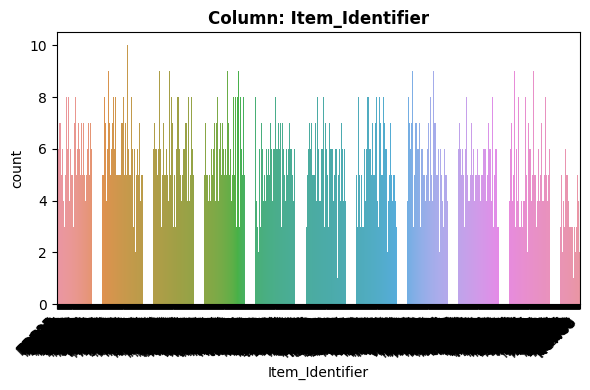

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [159]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 10. This is high.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



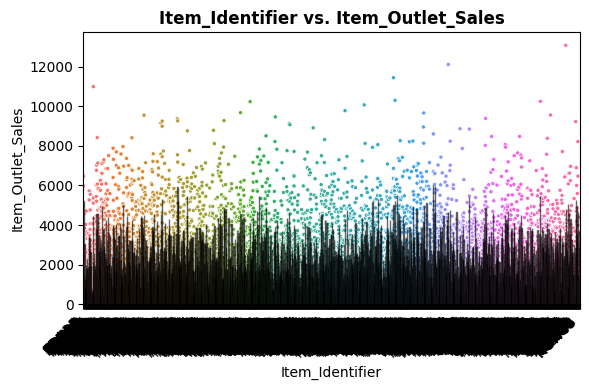

In [160]:
# Run the appropriate feature vs. target function (based on dtype)

plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not at all.
    
  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

### Item_Weight

- Item Weight:
  - Weight of product
  

In [161]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

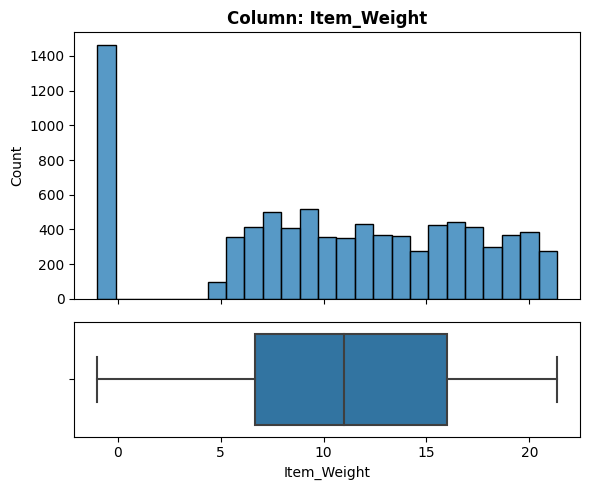

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '-1.0' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [162]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant, nor is it quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Not in my opinion. It may still be useful for the client to know how much an item weighs so that they can make reasonable purchases of the item(s) and not have too much overstock.



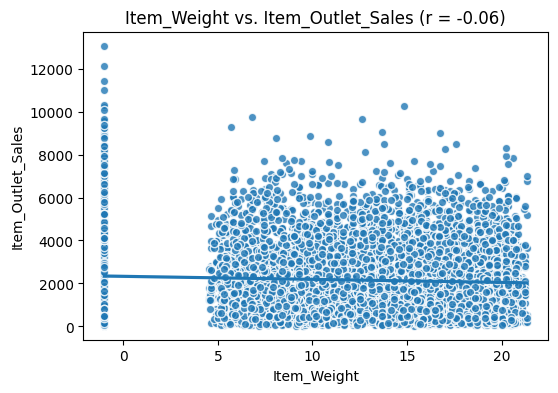

In [163]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, I would not expect this feature to be a predictor of the target.

  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

### Item_Fat_Content


- Item Fat Content:
  - Whether the product is low-fat or regular

  

In [164]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

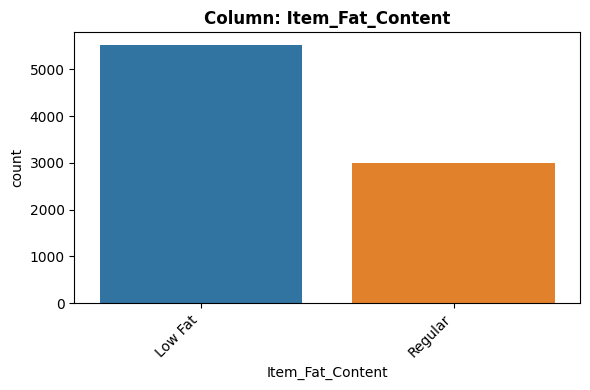

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [165]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categirical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 5517. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



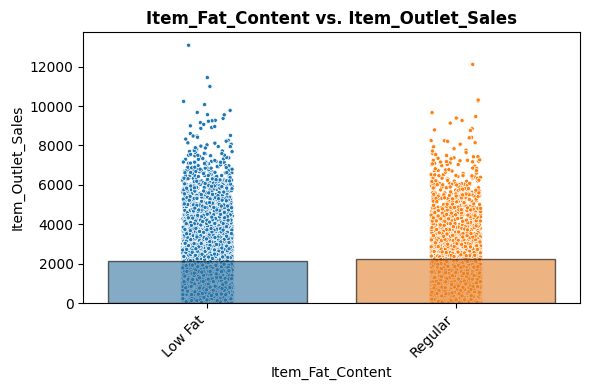

In [166]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would assume that Low Fat items would be purchased more frequently than Regular items.
    
  - Does this feature appear to be a predictor of the target?
    - Not at all.

___

### Item_Visibility

- Item Visibility:
  - The percentage of total display area of all products in a store allocated to the particular product
  

In [167]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

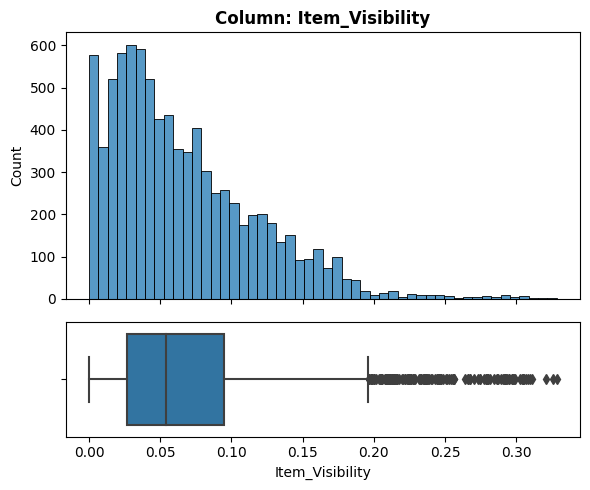

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [168]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant, nor is it quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes? It does not seem like this feature would be a good predictor of Item Outlet Sales since this could possibly change many times over a period of time.



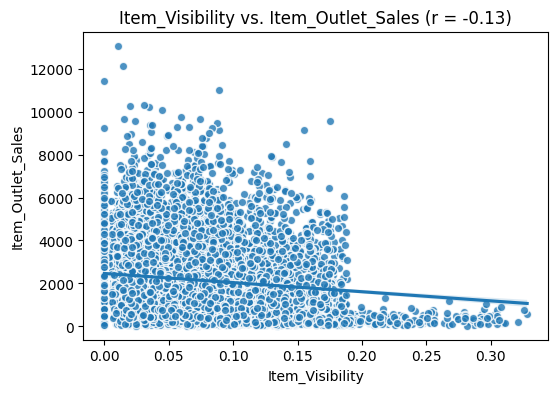

In [169]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not necessarilly. Though, I would assume that items closer to ground level would have more sales since the eye level of young children is closer to that level.
    
  - Does this feature appear to be a predictor of the target?
    - No, it does not.

___

### Item_Type


- Item Type:
  - The category to which the product belongs
  

In [170]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

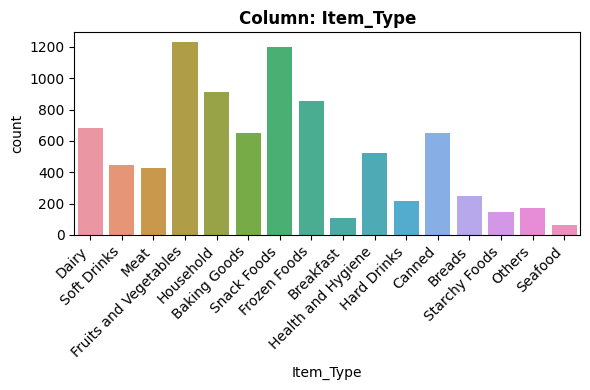

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [171]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 1232. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - None thast I can see.



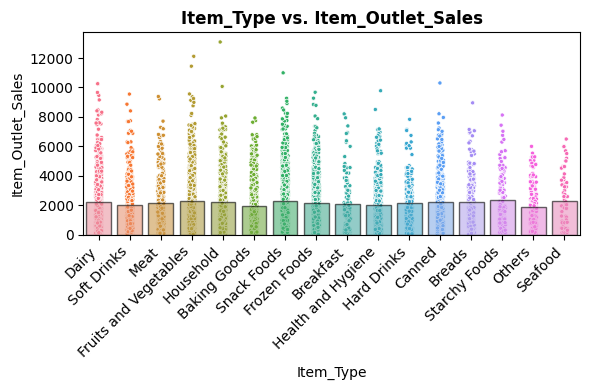

In [172]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes and no. I would have expected that some Household items or Other items could carry a higher price tag, which would increase the Item Outlet Sales.
    
  - Does this feature appear to be a predictor of the target?
    - Only slightly. Household items did in fact have higher sales. I was suprised to see that Fruits and Vegetables was just below that, and then everything else for the most part sat between the 8-10k range, with only two item stypes being less than 8k.

___

### Item_MRP

- Item MRP:
  - Maximum Retail Price (list price) of the product

  

In [173]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

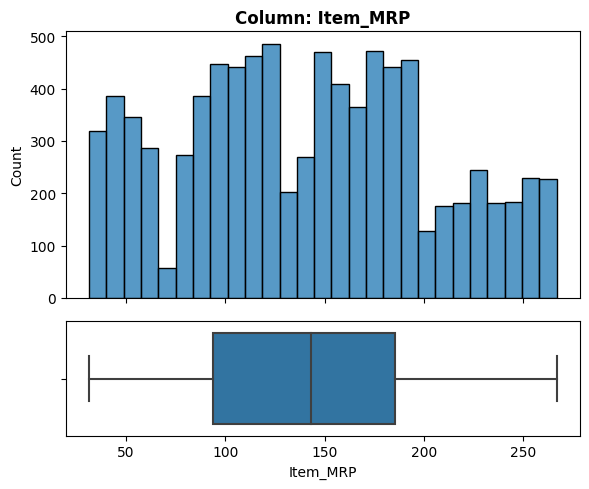

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [174]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  -Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes. The stores would need to know the MRP of the items that they were looking into purchasing so that they could calculate overall cost prior to purchase.



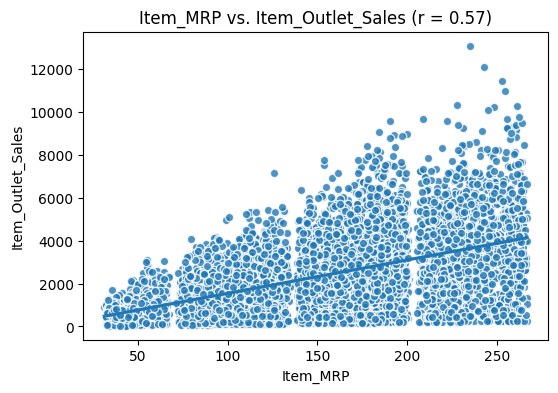

In [175]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Higher priced items will bring in higher ite outlet sales overall.
    
  - Does this feature appear to be a predictor of the target?
    - Yes! I am suprised however at the sheer amount of plots on the graph, especially in the 150-250+ range.

___

### Outlet_Identifier


- Outlet Identifier:
  - Store ID
  

In [176]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

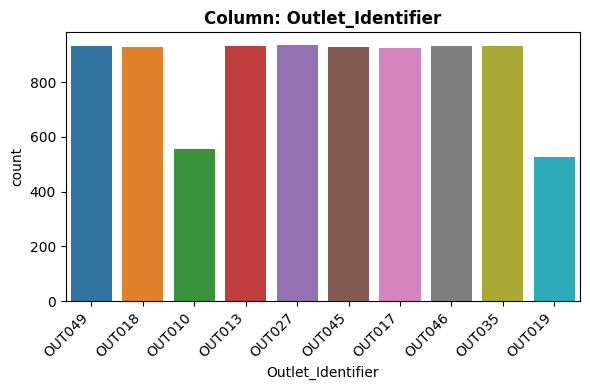

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [177]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 935. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No. This information is good for the client to have so that they know which outlet is most profitable and which is not.

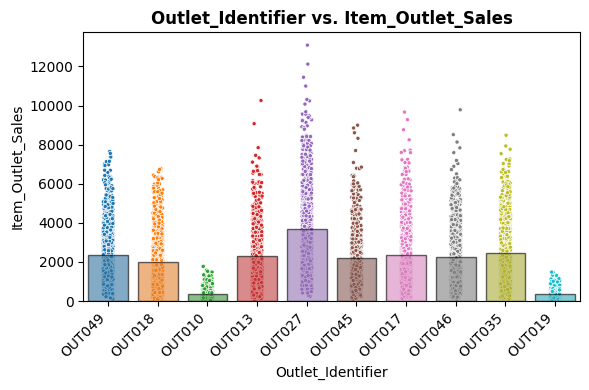

In [178]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. Outlets in densely populated areas would likely have higher item outlet sales since more people would be going to them, whereas the opposite would happen for ares that are not densely populated.
    
  - Does this feature appear to be a predictor of the target?
    - Yes. It is as I suspected in that some outlets have higher overall item outlet sales than others.

___

### Outlet_Establishment_Year


- Outlet Establishment Year:
  - The year in which store was established

  

In [179]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

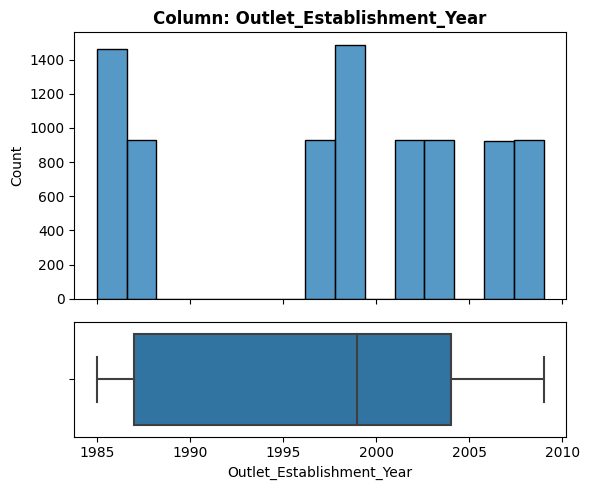

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [180]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this feature is numeric.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  -I do not believe that the outlet establishment year is necessarilly something that would be a predictor of higher item outlet sales, so I feel that it would be safe to remove the column from the dataset.



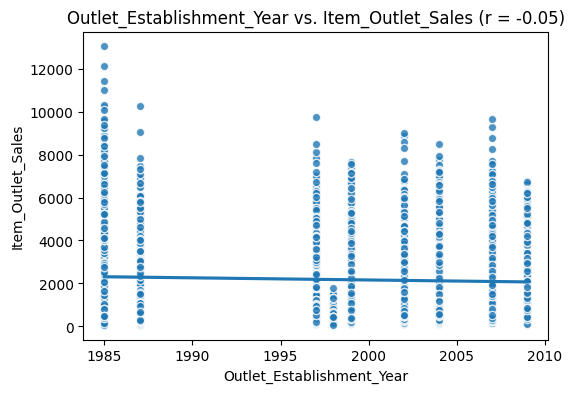

In [181]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I expect that there will not be much of a correlation between outlet establishment year and item outlet sales.
    
  - Does this feature appear to be a predictor of the target?
    - No.

___

### Outlet_Size

- Outlet Size:
  - The size of the store in terms of ground area covered

  

In [182]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

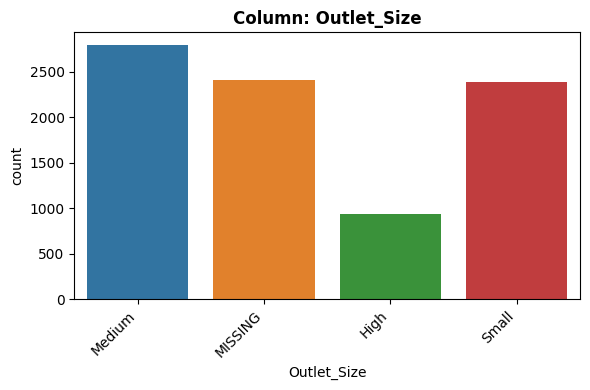

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [183]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (categorical).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 2793. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - None that I can think of.



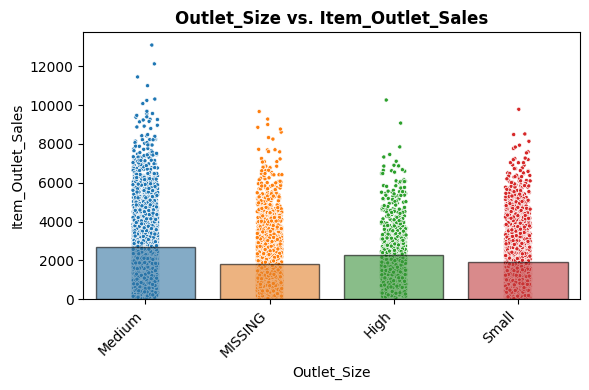

In [184]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would not expect this feature to be a predictor of the target.
    
  - Does this feature appear to be a predictor of the target?
    - Not by much. All of the outlet sizes appear to be within 2k of eachother in regards to item outlet sales.

___

### Outlet_Location_Type


- Outlet Location Type:
  - The type of area in which the store is located
  

In [185]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

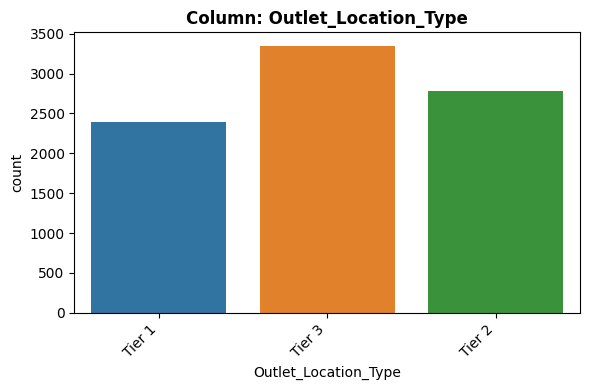

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [186]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (categorical).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  - This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 3350. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



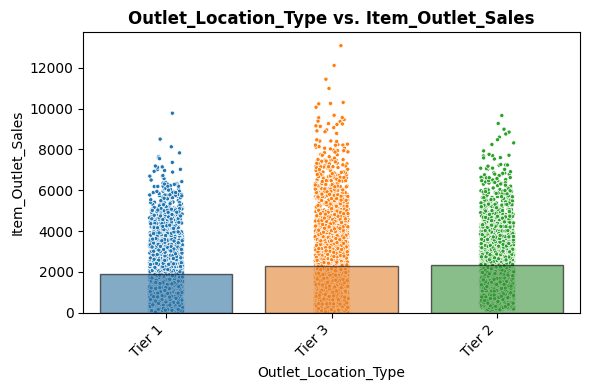

In [187]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Only slightly. I think it is safe to assume that the tiers likely represent whether the outlet is in the suburbs, city, or country.
    
  - Does this feature appear to be a predictor of the target?
    - Yes, but only slightly. The tiers are also within 2k of eachother in regards to item outlet sales.

___

### Outlet_Type

- Outlet Type:
  - Whether the outlet is a grocery store or some sort of supermarket
  

In [188]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

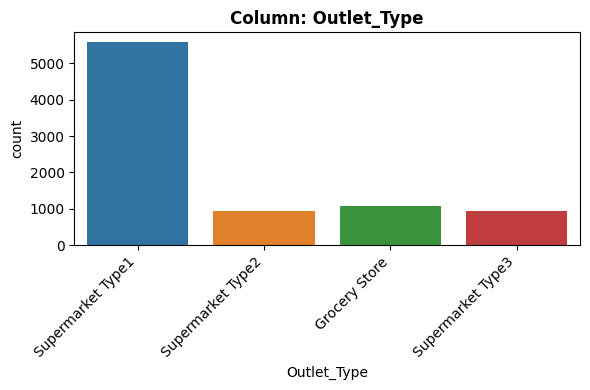

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [189]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
-  This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality of this feature is 5577. This is very high!

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, but we would need to know more about what each outlet type is specifically, so that we could further determine if this information is correlated with higher item outlet sales.



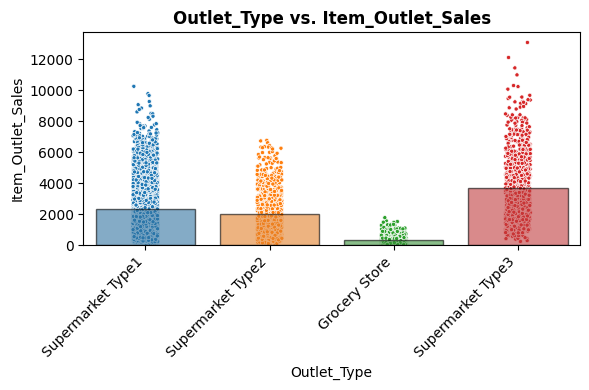

In [190]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I wouldn't have thought this this feature would be a predictor of the target.
    
  - Does this feature appear to be a predictor of the target?
    - Yes. Perhaps this could mean that one type of outlet type is closer to strip malls or outlet malls, so it sees higher foot trafic o a daily basis and thus gets more customers.

___

### Item_Outlet_Sales

- Item Outlet Sales:
  - Sales of the product in the particular store. This is the target variable to be predicted.

  

In [191]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

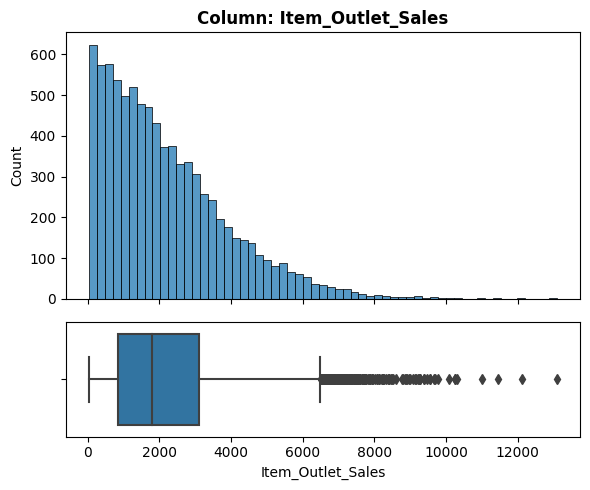

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [192]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (numeric).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - There are zero (0) null values.

3. Is the feature constant or quasi-constant?
  -  This feature is neither constant or quasi-constant.

4. What is the cardinality? Is it high?
  - Not applicable, this is a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No. This data shows us that the higher a price tag is on an item, the less that item will be sold. Whereas on the other side of the spectrum, lesser priced items would sell more since those are more within the everyday individuals financial means.

